In [1]:
# import statements

import pandas as pd
import numpy as np
import math
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas import Series

from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, BatchNormalization

from sklearn.model_selection import train_test_split
from random import shuffle

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE


/Users/nickeylawrence/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Read the Gear2 data
Gear2Files = ['./Gear2/segment2.csv', './Gear2/segment3.csv','./Gear2/segment4.csv',
              './Gear2/segment5.csv','./Gear2/segment6.csv']

X_Gear2=[0] * len(Gear2Files)
Y_Gear2=[0] * len(Gear2Files)
for index,file in enumerate(Gear2Files):
    X_Gear2[index] = pd.read_csv(file);
    Y_Gear2[index] = pd.DataFrame(data= np.full((X_Gear2[index].shape[0],1), 2));
    X_Gear2[index] = X_Gear2[index].assign(Gear=Y_Gear2[index].values);

# Read the Gear3 data
Gear3Files = ['./Gear3/segment1.csv', './Gear3/segment2.csv','./Gear3/segment3.csv',
              './Gear3/segment4.csv','./Gear3/segment5.csv', './Gear3/segment6.csv']

X_Gear3=[0] * len(Gear3Files)
Y_Gear3=[0] * len(Gear3Files)
for index,file in enumerate(Gear3Files):
    X_Gear3[index] = pd.read_csv(file);
    Y_Gear3[index] = pd.DataFrame(data= np.full((X_Gear3[index].shape[0],1), 3));
    X_Gear3[index] = X_Gear3[index].assign(Gear=Y_Gear3[index].values);

# Read the Gear4 data
Gear4Files = ['./Gear4/segment2.csv','./Gear4/segment3.csv','./Gear4/segment4.csv',
              './Gear4/segment5.csv', './Gear4/segment6a.csv','./Gear4/segment6b.csv']

X_Gear4=[0] * len(Gear4Files)
Y_Gear4=[0] * len(Gear4Files)
for index,file in enumerate(Gear4Files):
    X_Gear4[index] = pd.read_csv(file);
    Y_Gear4[index] = pd.DataFrame(data= np.full((X_Gear4[index].shape[0],1), 4));
    X_Gear4[index] = X_Gear4[index].assign(Gear=Y_Gear4[index].values);

# Read the Gear 5 data
Gear5Files = ['./Double/segment1.csv','./Double/segment2.csv','./Double/segment3.csv',
              './Double/segment4.csv', './Double/segment5.csv','./Double/segment7.csv']

X_Gear5=[0] * len(Gear5Files)
Y_Gear5=[0] * len(Gear5Files)
for index,file in enumerate(Gear5Files):
    X_Gear5[index] = pd.read_csv(file);
    Y_Gear5[index] = pd.DataFrame(data= np.full((X_Gear5[index].shape[0],1), 5));
    X_Gear5[index] = X_Gear5[index].assign(Gear=Y_Gear5[index].values);

In [3]:
# Implement moving average for a window size of 3, and split the segments such that each has 750 time-steps

limit = 750
features = list(X_Gear2[0].columns);
scaledFeatures = [item for item in features if item not in ['t','Gear']]

XGear=[]
for index in range(len(X_Gear2)):
    dataG2 = X_Gear2[index];
    x = dataG2[scaledFeatures];
    rolling = x.rolling(window=10);
    rolling_mean = rolling.mean();
    X_Gear2[index][scaledFeatures] = rolling_mean;
    dataG2 = X_Gear2[index].iloc[10:, :];
    gearRange = math.ceil(len(dataG2)/limit);
    XGear += [dataG2[t*limit:t*limit + limit] for t in range(gearRange)];  
    
for index in range(len(X_Gear3)):
    dataG3 = X_Gear3[index];
    x = dataG3[scaledFeatures];
    rolling = x.rolling(window=10);
    rolling_mean = rolling.mean();
    X_Gear3[index][scaledFeatures] = rolling_mean;
    dataG3 = X_Gear3[index].iloc[10:, :];
    gearRange = math.ceil(len(dataG3)/limit);
    XGear += [dataG3[t*limit:t*limit + limit] for t in range(gearRange)];  
    
for index in range(len(X_Gear4)):
    dataG4 = X_Gear4[index];
    x = dataG4[scaledFeatures];
    rolling = x.rolling(window=10);
    rolling_mean = rolling.mean();
    X_Gear4[index][scaledFeatures] = rolling_mean;
    dataG4 = X_Gear4[index].iloc[10:, :];
    gearRange = math.ceil(len(dataG4)/limit);
    XGear += [dataG4[t*limit:t*limit + limit] for t in range(gearRange)];  
    
    
for index in range(len(X_Gear5)):
    dataG5 = X_Gear5[index];
    x = dataG5[scaledFeatures];
    rolling = x.rolling(window=10);
    rolling_mean = rolling.mean();
    X_Gear5[index][scaledFeatures] = rolling_mean;
    dataG5 = X_Gear5[index].iloc[10:, :];
    gearRange = math.ceil(len(dataG5)/limit);
    XGear += [dataG5[t*limit:t*limit + limit] for t in range(gearRange)];  
    
    

In [4]:
X = XGear[:] # Copy words
shuffle(X) 

In [5]:
X = pd.concat(X);

In [6]:
data = pd.DataFrame(X);

data.reset_index(inplace = True, drop = True)
for i in range(len(data)):
    data.loc[i,'t'] = i*0.02

In [7]:
features = list(data.columns);


In [8]:
# Create one-hot Y vectors
features.remove('Gear')
X = data[features]
Y = data['Gear']
# Create one-hot Y vectors
Y_onehot = pd.get_dummies(Y).values;

In [9]:
print(Y_onehot)

[[0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 ...
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]


In [10]:
X = np.array(X)
Y = np.array(Y_onehot)

In [11]:
timesteps = 1
XNew = X.reshape(X.shape[0],timesteps,21)
YNew = Y.reshape(Y.shape[0],timesteps,4)

trainX, testX, trainY, testY = train_test_split(XNew, YNew, test_size=0.2);

trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.2);

In [14]:
# design and fit our LSTM network

epochs = 25
batch_size=100
    
def different_models(hiddendim):
    model = Sequential();
    model.add(LSTM(hiddendim, return_sequences = True, input_shape = (timesteps, 20)));
    model.add(Dense(4, activation = 'softmax'));
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
    return model

Train on 16460 samples, validate on 4116 samples
Epoch 1/25
16460/16460 [==============================] - 5s 304us/step - loss: 1.1039 - categorical_accuracy: 0.5538 - val_loss: 0.9070 - val_categorical_accuracy: 0.6480
Epoch 2/25
16460/16460 [==============================] - 2s 125us/step - loss: 0.8165 - categorical_accuracy: 0.6852 - val_loss: 0.7567 - val_categorical_accuracy: 0.7051
Epoch 3/25
16460/16460 [==============================] - 2s 146us/step - loss: 0.6962 - categorical_accuracy: 0.7194 - val_loss: 0.6630 - val_categorical_accuracy: 0.7259
Epoch 4/25
16460/16460 [==============================] - 2s 123us/step - loss: 0.6170 - categorical_accuracy: 0.7474 - val_loss: 0.5941 - val_categorical_accuracy: 0.7617
Epoch 5/25
16460/16460 [==============================] - 2s 135us/step - loss: 0.5583 - categorical_accuracy: 0.7797 - val_loss: 0.5416 - val_categorical_accuracy: 0.7923
Epoch 6/25
16460/16460 [==============================] - 2s 126us/step - loss: 0.5093 - ca

/Users/nickeylawrence/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Train on 16460 samples, validate on 4116 samples
Epoch 1/25
16460/16460 [==============================] - 6s 340us/step - loss: 0.9822 - categorical_accuracy: 0.5728 - val_loss: 0.7340 - val_categorical_accuracy: 0.6990
Epoch 2/25
16460/16460 [==============================] - 3s 163us/step - loss: 0.6385 - categorical_accuracy: 0.7426 - val_loss: 0.5758 - val_categorical_accuracy: 0.7753
Epoch 3/25
16460/16460 [==============================] - 3s 188us/step - loss: 0.5172 - categorical_accuracy: 0.8047 - val_loss: 0.4765 - val_categorical_accuracy: 0.8212
Epoch 4/25
16460/16460 [==============================] - 3s 178us/step - loss: 0.4277 - categorical_accuracy: 0.8408 - val_loss: 0.4019 - val_categorical_accuracy: 0.8499
Epoch 5/25
16460/16460 [==============================] - 3s 185us/step - loss: 0.3632 - categorical_accuracy: 0.8685 - val_loss: 0.3496 - val_categorical_accuracy: 0.8656
Epoch 6/25
16460/16460 [==============================] - 4s 222us/step - loss: 0.3191 - ca

Epoch 21/25
16460/16460 [==============================] - 4s 240us/step - loss: 0.0689 - categorical_accuracy: 0.9813 - val_loss: 0.0793 - val_categorical_accuracy: 0.9750
Epoch 22/25
16460/16460 [==============================] - 6s 346us/step - loss: 0.0661 - categorical_accuracy: 0.9807 - val_loss: 0.0745 - val_categorical_accuracy: 0.9772
Epoch 23/25
16460/16460 [==============================] - 5s 309us/step - loss: 0.0608 - categorical_accuracy: 0.9835 - val_loss: 0.0782 - val_categorical_accuracy: 0.9740
Epoch 24/25
16460/16460 [==============================] - 5s 326us/step - loss: 0.0596 - categorical_accuracy: 0.9831 - val_loss: 0.0696 - val_categorical_accuracy: 0.9796
Epoch 25/25
16460/16460 [==============================] - 5s 329us/step - loss: 0.0527 - categorical_accuracy: 0.9854 - val_loss: 0.0620 - val_categorical_accuracy: 0.9832
##################################################################################
Model with  64  hidden units 
Evaluated Scores [Loss

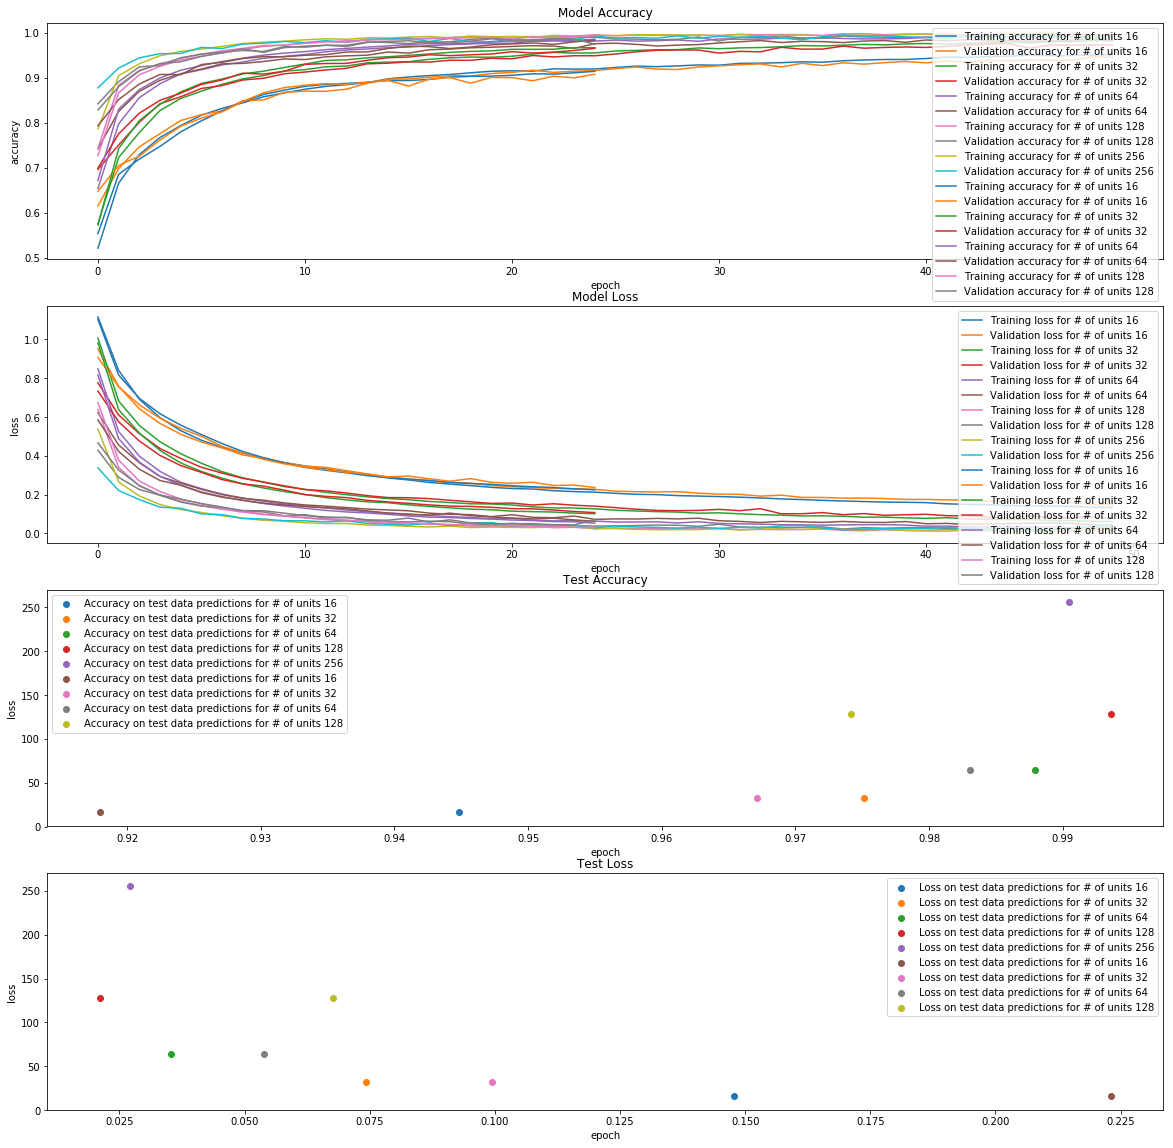

In [15]:
hidden_units = [16, 32, 64, 128, 256]

for i in range(4):
    returnedModel = different_models(hidden_units[i]);
    historyModel = returnedModel.fit(trainX[:,:,1:], trainY, epochs=epochs, batch_size=batch_size, validation_data=(valX[:,:,1:],valY))   
    
    # Evaluate
    predictions = returnedModel.predict_classes(testX[:,:,1:])
    
    scores = returnedModel.evaluate(testX[:,:,1:], testY, verbose=2)
    print('##################################################################################')
    print('Model with ', hidden_units[i] , ' hidden units ')
    print('Evaluated Scores [Loss, Accuracy] on Test Data : ', scores)
    print('##################################################################################')

    # summarize history for accuracy
    plt.figure(0,figsize=(20, 20))
    plt.subplot(4, 1, 1)
    plt.plot(historyModel.history['categorical_accuracy'], label = 'Training accuracy for # of units ' + str(hidden_units[i]))
    plt.plot(historyModel.history['val_categorical_accuracy'], label = 'Validation accuracy for # of units ' + str(hidden_units[i]))
    plt.title('Model Accuracy');
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend()
    # summarize history for loss
    plt.subplot(4, 1, 2)
    plt.plot(historyModel.history['loss'], label = 'Training loss for # of units ' + str(hidden_units[i]))
    plt.plot(historyModel.history['val_loss'], label = 'Validation loss for # of units ' + str(hidden_units[i]))
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    
    # Plot accuracy and loss on test data predictions
    plt.subplot(4, 1, 3)
    plt.scatter(scores[1], hidden_units[i], label = 'Accuracy on test data predictions for # of units ' + str(hidden_units[i]))
    plt.title('Test Accuracy')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    
    plt.subplot(4, 1, 4)
    plt.scatter(scores[0], hidden_units[i], label = 'Loss on test data predictions for # of units ' + str(hidden_units[i]))
    plt.title('Test Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()

    
plt.show()